In [1]:
%cd ..


/Users/kubak/Desktop/mini/sem1/EvolutionaryGradient


In [2]:
from models.neural_network import MLP, DeepMLP
from models.de import DifferentialEvolution
from models.es import train_es
from models.adam import train_with_adam
from utils.data_loader import load_mnist, load_wine_dataset, load_breast_cancer_dataset, load_iris_dataset
from utils.metrics import evaluate_model
import torch

### Load Datasets

In [3]:
import matplotlib.pyplot as plt
seed=42

In [4]:
# Załaduj dane wine
train_loader_wine, valid_loader_wine, test_loader_wine, input_size_wine, output_size_wine = load_wine_dataset(batch_size=32, seed=seed)

In [5]:
# Załaduj dane mnist
train_loader_mnist, valid_loader_mnist, test_loader_mnist, input_size_mnist, output_size_mnist = load_mnist(batch_size=32, seed=seed)

In [6]:
# Załaduj dane mnist
train_loader_bcw, valid_loader_bcw, test_loader_bcw, input_size_bcw, output_size_bcw = load_breast_cancer_dataset(batch_size=32, seed=seed)

In [7]:
# Załaduj dane mnist
train_loader_iris, valid_loader_iris, test_loader_iris, input_size_iris, output_size_iris = load_iris_dataset(batch_size=32, seed=seed)

In [8]:
print(f' rozmiar wine: {input_size_wine}, {output_size_wine}')
print(f' rozmiar mnist: {input_size_mnist}, {output_size_mnist}')


 rozmiar wine: 13, 3
 rozmiar mnist: 784, 10


# Create Neural Network

In [9]:
# Zainicjalizuj model

model_wine = MLP(input_size=input_size_wine, hidden_size=10, output_size=output_size_wine)

model_iris = MLP(input_size=input_size_iris, hidden_size=input_size_iris*2, output_size=output_size_iris)

model_bcw = MLP(input_size=input_size_bcw, hidden_size=input_size_bcw*2, output_size=output_size_bcw)

In [10]:
model_bcw = DeepMLP(input_size=input_size_bcw, hidden_sizes=[input_size_bcw*2, input_size_bcw], output_size=output_size_bcw)

model_iris = DeepMLP(input_size=input_size_iris, hidden_sizes=[input_size_iris*2, input_size_iris], output_size=output_size_iris)

model_wine = DeepMLP(input_size=input_size_wine, hidden_sizes=[input_size_wine*2, input_size_wine], output_size=output_size_wine)

# Train

In [11]:
epochs = 20 
learning_rate = 0.001

In [12]:
# Example usage:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [13]:
model_bcw_trained, history = train_es(model_bcw, train_loader_bcw, valid_loader_bcw, variant='modified-ES', mu=30, lambda_=30, max_evals=15000, device=device)

Generation 1:
  Training Loss: 8.0498, Accuracy: 75.88%
  Validation Loss: 7.7377, Accuracy: 77.19%
  Best Fitness: 1368.4628
Generation 2:
  Training Loss: 7.3636, Accuracy: 77.65%
  Validation Loss: 9.1965, Accuracy: 74.85%
  Best Fitness: 1251.8169
Generation 3:
  Training Loss: 7.3636, Accuracy: 77.65%
  Validation Loss: 9.1965, Accuracy: 74.85%
  Best Fitness: 1251.8169
Generation 4:
  Training Loss: 6.3900, Accuracy: 78.82%
  Validation Loss: 6.0779, Accuracy: 72.51%
  Best Fitness: 1086.3020
Generation 5:
  Training Loss: 6.3900, Accuracy: 78.82%
  Validation Loss: 6.0779, Accuracy: 72.51%
  Best Fitness: 1086.3020
Generation 6:
  Training Loss: 6.3900, Accuracy: 78.82%
  Validation Loss: 6.0779, Accuracy: 72.51%
  Best Fitness: 1086.3020
Generation 7:
  Training Loss: 6.3900, Accuracy: 78.82%
  Validation Loss: 6.0779, Accuracy: 72.51%
  Best Fitness: 1086.3020
Generation 8:
  Training Loss: 5.3619, Accuracy: 86.47%
  Validation Loss: 6.1986, Accuracy: 81.29%
  Best Fitness: 91

In [14]:
model_wine_trained, history = train_es(model_wine, train_loader_wine, valid_loader_wine, variant='modified-ES', mu=30, lambda_=30, max_evals=15000, device=device)

Generation 1:
  Training Loss: 2.7561, Accuracy: 75.47%
  Validation Loss: 3.3226, Accuracy: 75.47%
  Best Fitness: 146.0708
Generation 2:
  Training Loss: 2.7561, Accuracy: 75.47%
  Validation Loss: 3.3226, Accuracy: 75.47%
  Best Fitness: 146.0708
Generation 3:
  Training Loss: 2.7561, Accuracy: 75.47%
  Validation Loss: 3.3226, Accuracy: 75.47%
  Best Fitness: 146.0708
Generation 4:
  Training Loss: 2.7561, Accuracy: 75.47%
  Validation Loss: 3.3226, Accuracy: 75.47%
  Best Fitness: 146.0708
Generation 5:
  Training Loss: 2.7561, Accuracy: 75.47%
  Validation Loss: 3.3226, Accuracy: 75.47%
  Best Fitness: 146.0708
Generation 6:
  Training Loss: 2.7561, Accuracy: 75.47%
  Validation Loss: 3.3226, Accuracy: 75.47%
  Best Fitness: 146.0708
Generation 7:
  Training Loss: 2.7561, Accuracy: 75.47%
  Validation Loss: 3.3226, Accuracy: 75.47%
  Best Fitness: 146.0708
Generation 8:
  Training Loss: 2.7561, Accuracy: 75.47%
  Validation Loss: 3.3226, Accuracy: 75.47%
  Best Fitness: 146.0708


In [15]:
model_iris_trained, history_iris = train_es(model_iris, train_loader_iris, valid_loader_iris, variant='modified-ES', mu=30, lambda_=30, max_evals=15000, device=device)

Generation 1:
  Training Loss: 1.8002, Accuracy: 33.33%
  Validation Loss: 1.5320, Accuracy: 33.33%
  Best Fitness: 81.0084
Generation 2:
  Training Loss: 1.0938, Accuracy: 40.00%
  Validation Loss: 1.0932, Accuracy: 46.67%
  Best Fitness: 49.2205
Generation 3:
  Training Loss: 1.0938, Accuracy: 40.00%
  Validation Loss: 1.0932, Accuracy: 46.67%
  Best Fitness: 49.2205
Generation 4:
  Training Loss: 1.0938, Accuracy: 40.00%
  Validation Loss: 1.0932, Accuracy: 46.67%
  Best Fitness: 49.2205
Generation 5:
  Training Loss: 0.7730, Accuracy: 66.67%
  Validation Loss: 0.8027, Accuracy: 62.22%
  Best Fitness: 34.7841
Generation 6:
  Training Loss: 0.7730, Accuracy: 66.67%
  Validation Loss: 0.8027, Accuracy: 62.22%
  Best Fitness: 34.7841
Generation 7:
  Training Loss: 0.7730, Accuracy: 66.67%
  Validation Loss: 0.8027, Accuracy: 62.22%
  Best Fitness: 34.7841
Generation 8:
  Training Loss: 0.5957, Accuracy: 73.33%
  Validation Loss: 0.2805, Accuracy: 88.89%
  Best Fitness: 26.8087
Generati

# Train adam

In [16]:
# Wybierz i uruchom metodę treningu
train_with_adam(model_wine, train_loader_wine, valid_loader_wine, epochs, learning_rate, device='cpu')

Epoch 1/20: 100%|██████████| 2/2 [00:00<00:00, 95.39batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 1 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 15.6184, Validation Accuracy: 79.25%



Epoch 2/20: 100%|██████████| 2/2 [00:00<00:00, 1092.41batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 2 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 15.6129, Validation Accuracy: 79.25%



Epoch 3/20: 100%|██████████| 2/2 [00:00<00:00, 1034.61batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 3 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 15.6084, Validation Accuracy: 79.25%



Epoch 4/20: 100%|██████████| 2/2 [00:00<00:00, 1237.81batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 4 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 15.6035, Validation Accuracy: 79.25%



Epoch 5/20: 100%|██████████| 2/2 [00:00<00:00, 1195.47batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 5 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 15.5985, Validation Accuracy: 79.25%



Epoch 6/20: 100%|██████████| 2/2 [00:00<00:00, 1339.61batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 6 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 15.5932, Validation Accuracy: 79.25%



Epoch 7/20: 100%|██████████| 2/2 [00:00<00:00, 1218.74batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 7 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 15.5881, Validation Accuracy: 79.25%



Epoch 8/20: 100%|██████████| 2/2 [00:00<00:00, 1025.75batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 8 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 15.5832, Validation Accuracy: 79.25%



Epoch 9/20: 100%|██████████| 2/2 [00:00<00:00, 1081.70batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 9 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 15.5784, Validation Accuracy: 79.25%



Epoch 10/20: 100%|██████████| 2/2 [00:00<00:00, 1004.14batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 10 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 15.5737, Validation Accuracy: 79.25%



Epoch 11/20: 100%|██████████| 2/2 [00:00<00:00, 1296.74batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 11 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 15.5693, Validation Accuracy: 79.25%



Epoch 12/20: 100%|██████████| 2/2 [00:00<00:00, 1212.23batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 12 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 15.5652, Validation Accuracy: 79.25%



Epoch 13/20: 100%|██████████| 2/2 [00:00<00:00, 1074.09batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 13 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 15.5613, Validation Accuracy: 79.25%



Epoch 14/20: 100%|██████████| 2/2 [00:00<00:00, 1104.49batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 14 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 15.5576, Validation Accuracy: 79.25%



Epoch 15/20: 100%|██████████| 2/2 [00:00<00:00, 1109.90batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 15 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 15.5538, Validation Accuracy: 79.25%



Epoch 16/20: 100%|██████████| 2/2 [00:00<00:00, 1085.20batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 16 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 15.5503, Validation Accuracy: 79.25%



Epoch 17/20: 100%|██████████| 2/2 [00:00<00:00, 1036.91batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 17 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 15.5467, Validation Accuracy: 79.25%



Epoch 18/20: 100%|██████████| 2/2 [00:00<00:00, 1154.66batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 18 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 15.5431, Validation Accuracy: 79.25%



Epoch 19/20: 100%|██████████| 2/2 [00:00<00:00, 1103.76batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 19 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 15.5394, Validation Accuracy: 79.25%



Epoch 20/20: 100%|██████████| 2/2 [00:00<00:00, 1108.14batch/s, Loss=0.0000, Accuracy=100.00%]

Epoch 20 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 15.5356, Validation Accuracy: 79.25%



In [17]:
# Wybierz i uruchom metodę treningu
train_with_adam(model_iris, train_loader_iris, valid_loader_iris, epochs, learning_rate, device='cpu')

Epoch 1/20: 100%|██████████| 2/2 [00:00<00:00, 795.20batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 1 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 0.0000, Validation Accuracy: 100.00%



Epoch 2/20: 100%|██████████| 2/2 [00:00<00:00, 1310.72batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 2 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 0.0000, Validation Accuracy: 100.00%



Epoch 3/20: 100%|██████████| 2/2 [00:00<00:00, 1177.02batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 3 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 0.0000, Validation Accuracy: 100.00%



Epoch 4/20: 100%|██████████| 2/2 [00:00<00:00, 1086.33batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 4 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 0.0000, Validation Accuracy: 100.00%



Epoch 5/20: 100%|██████████| 2/2 [00:00<00:00, 1114.17batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 5 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 0.0000, Validation Accuracy: 100.00%



Epoch 6/20: 100%|██████████| 2/2 [00:00<00:00, 1129.93batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 6 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 0.0000, Validation Accuracy: 100.00%



Epoch 7/20: 100%|██████████| 2/2 [00:00<00:00, 1163.47batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 7 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 0.0000, Validation Accuracy: 100.00%



Epoch 8/20: 100%|██████████| 2/2 [00:00<00:00, 1123.57batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 8 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 0.0000, Validation Accuracy: 100.00%



Epoch 9/20: 100%|██████████| 2/2 [00:00<00:00, 1217.15batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 9 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 0.0000, Validation Accuracy: 100.00%



Epoch 10/20: 100%|██████████| 2/2 [00:00<00:00, 1117.29batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 10 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 0.0000, Validation Accuracy: 100.00%



Epoch 11/20: 100%|██████████| 2/2 [00:00<00:00, 1209.26batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 11 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 0.0000, Validation Accuracy: 100.00%



Epoch 12/20: 100%|██████████| 2/2 [00:00<00:00, 1184.16batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 12 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 0.0000, Validation Accuracy: 100.00%



Epoch 13/20: 100%|██████████| 2/2 [00:00<00:00, 1115.51batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 13 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 0.0000, Validation Accuracy: 100.00%



Epoch 14/20: 100%|██████████| 2/2 [00:00<00:00, 1224.79batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 14 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 0.0000, Validation Accuracy: 100.00%



Epoch 15/20: 100%|██████████| 2/2 [00:00<00:00, 1248.68batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 15 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 0.0000, Validation Accuracy: 100.00%



Epoch 16/20: 100%|██████████| 2/2 [00:00<00:00, 1248.49batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 16 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 0.0000, Validation Accuracy: 100.00%



Epoch 17/20: 100%|██████████| 2/2 [00:00<00:00, 1221.05batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 17 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 0.0000, Validation Accuracy: 100.00%



Epoch 18/20: 100%|██████████| 2/2 [00:00<00:00, 1274.67batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 18 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 0.0000, Validation Accuracy: 100.00%



Epoch 19/20: 100%|██████████| 2/2 [00:00<00:00, 1107.41batch/s, Loss=0.0000, Accuracy=100.00%]


Epoch 19 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 0.0000, Validation Accuracy: 100.00%



Epoch 20/20: 100%|██████████| 2/2 [00:00<00:00, 1067.66batch/s, Loss=0.0000, Accuracy=100.00%]

Epoch 20 completed. Training Loss: 0.0000, Training Accuracy: 100.00%
Validation Loss: 0.0000, Validation Accuracy: 100.00%



In [18]:
# Wybierz i uruchom metodę treningu
train_with_adam(model_bcw, train_loader_bcw, valid_loader_bcw, epochs, learning_rate, device='cpu')

Epoch 1/20: 100%|██████████| 6/6 [00:00<00:00, 1110.68batch/s, Loss=1.3457, Accuracy=96.47%]


Epoch 1 completed. Training Loss: 1.3457, Training Accuracy: 96.47%
Validation Loss: 7.3691, Validation Accuracy: 93.57%



Epoch 2/20: 100%|██████████| 6/6 [00:00<00:00, 1121.27batch/s, Loss=0.9985, Accuracy=96.47%]


Epoch 2 completed. Training Loss: 0.9985, Training Accuracy: 96.47%
Validation Loss: 7.2296, Validation Accuracy: 93.57%



Epoch 3/20: 100%|██████████| 6/6 [00:00<00:00, 1147.45batch/s, Loss=0.5814, Accuracy=96.47%]


Epoch 3 completed. Training Loss: 0.5814, Training Accuracy: 96.47%
Validation Loss: 7.1729, Validation Accuracy: 92.98%



Epoch 4/20: 100%|██████████| 6/6 [00:00<00:00, 1125.48batch/s, Loss=0.4484, Accuracy=97.65%]


Epoch 4 completed. Training Loss: 0.4484, Training Accuracy: 97.65%
Validation Loss: 7.0905, Validation Accuracy: 92.98%



Epoch 5/20: 100%|██████████| 6/6 [00:00<00:00, 1083.61batch/s, Loss=0.3905, Accuracy=97.65%]


Epoch 5 completed. Training Loss: 0.3905, Training Accuracy: 97.65%
Validation Loss: 6.9877, Validation Accuracy: 93.57%



Epoch 6/20: 100%|██████████| 6/6 [00:00<00:00, 1140.95batch/s, Loss=0.2419, Accuracy=97.65%]


Epoch 6 completed. Training Loss: 0.2419, Training Accuracy: 97.65%
Validation Loss: 6.9130, Validation Accuracy: 93.57%



Epoch 7/20: 100%|██████████| 6/6 [00:00<00:00, 1102.51batch/s, Loss=0.1620, Accuracy=98.24%]


Epoch 7 completed. Training Loss: 0.1620, Training Accuracy: 98.24%
Validation Loss: 6.8280, Validation Accuracy: 93.57%



Epoch 8/20: 100%|██████████| 6/6 [00:00<00:00, 1091.70batch/s, Loss=0.1014, Accuracy=98.82%]


Epoch 8 completed. Training Loss: 0.1014, Training Accuracy: 98.82%
Validation Loss: 6.7717, Validation Accuracy: 93.57%



Epoch 9/20: 100%|██████████| 6/6 [00:00<00:00, 1172.14batch/s, Loss=0.0548, Accuracy=98.82%]


Epoch 9 completed. Training Loss: 0.0548, Training Accuracy: 98.82%
Validation Loss: 6.7421, Validation Accuracy: 93.57%



Epoch 10/20: 100%|██████████| 6/6 [00:00<00:00, 1187.85batch/s, Loss=0.0476, Accuracy=99.41%]


Epoch 10 completed. Training Loss: 0.0476, Training Accuracy: 99.41%
Validation Loss: 6.7483, Validation Accuracy: 93.57%



Epoch 11/20: 100%|██████████| 6/6 [00:00<00:00, 1203.88batch/s, Loss=0.0233, Accuracy=99.41%]


Epoch 11 completed. Training Loss: 0.0233, Training Accuracy: 99.41%
Validation Loss: 6.7658, Validation Accuracy: 93.57%



Epoch 12/20: 100%|██████████| 6/6 [00:00<00:00, 1183.72batch/s, Loss=0.0132, Accuracy=99.41%]


Epoch 12 completed. Training Loss: 0.0132, Training Accuracy: 99.41%
Validation Loss: 6.7975, Validation Accuracy: 93.57%



Epoch 13/20: 100%|██████████| 6/6 [00:00<00:00, 1151.17batch/s, Loss=0.0042, Accuracy=100.00%]


Epoch 13 completed. Training Loss: 0.0042, Training Accuracy: 100.00%
Validation Loss: 6.7946, Validation Accuracy: 93.57%



Epoch 14/20: 100%|██████████| 6/6 [00:00<00:00, 1181.33batch/s, Loss=0.0008, Accuracy=100.00%]


Epoch 14 completed. Training Loss: 0.0008, Training Accuracy: 100.00%
Validation Loss: 6.7824, Validation Accuracy: 93.57%



Epoch 15/20: 100%|██████████| 6/6 [00:00<00:00, 1182.27batch/s, Loss=0.0003, Accuracy=100.00%]


Epoch 15 completed. Training Loss: 0.0003, Training Accuracy: 100.00%
Validation Loss: 6.7725, Validation Accuracy: 93.57%



Epoch 16/20: 100%|██████████| 6/6 [00:00<00:00, 1195.53batch/s, Loss=0.0002, Accuracy=100.00%]


Epoch 16 completed. Training Loss: 0.0002, Training Accuracy: 100.00%
Validation Loss: 6.7635, Validation Accuracy: 93.57%



Epoch 17/20: 100%|██████████| 6/6 [00:00<00:00, 1102.17batch/s, Loss=0.0002, Accuracy=100.00%]


Epoch 17 completed. Training Loss: 0.0002, Training Accuracy: 100.00%
Validation Loss: 6.7590, Validation Accuracy: 93.57%



Epoch 18/20: 100%|██████████| 6/6 [00:00<00:00, 1075.10batch/s, Loss=0.0001, Accuracy=100.00%]


Epoch 18 completed. Training Loss: 0.0001, Training Accuracy: 100.00%
Validation Loss: 6.7567, Validation Accuracy: 93.57%



Epoch 19/20: 100%|██████████| 6/6 [00:00<00:00, 1154.98batch/s, Loss=0.0001, Accuracy=100.00%]


Epoch 19 completed. Training Loss: 0.0001, Training Accuracy: 100.00%
Validation Loss: 6.7563, Validation Accuracy: 93.57%



Epoch 20/20: 100%|██████████| 6/6 [00:00<00:00, 1203.93batch/s, Loss=0.0001, Accuracy=100.00%]


Epoch 20 completed. Training Loss: 0.0001, Training Accuracy: 100.00%
Validation Loss: 6.7566, Validation Accuracy: 93.57%



# Evaluation

# Plot results

In [19]:
import json
from experiments.plot_experiments import plot_accuracy_evolution, get_averages, process_data, plot_analysis_of_input, plot_training_history, plot_training_time

In [20]:
results_path = "experiments/results/history_all.json"

In [21]:
# Wczytanie danych z pliku JSON
with open(results_path, 'r') as f:
    results = json.load(f)


wine_MLP_modified-ES_mu30_lambda30
4.641968727111816
wine_MLP_modified-ES_mu50_lambda50
4.453682899475098
wine_MLP_mu-lambda_mu30_lambda30
4.775733947753906
wine_MLP_mu-lambda_mu50_lambda50
4.705871105194092
wine_DeepMLP_modified-ES_mu30_lambda30
5.257304906845093
wine_DeepMLP_modified-ES_mu50_lambda50
5.2815680503845215
wine_DeepMLP_mu-lambda_mu30_lambda30
5.301597833633423
wine_DeepMLP_mu-lambda_mu50_lambda50
5.2215611934661865
iris_MLP_modified-ES_mu30_lambda30
4.303271293640137
iris_MLP_modified-ES_mu50_lambda50
4.253333806991577
iris_MLP_mu-lambda_mu30_lambda30
4.410675048828125
iris_MLP_mu-lambda_mu50_lambda50
4.392879962921143
iris_DeepMLP_modified-ES_mu30_lambda30
4.711728096008301
iris_DeepMLP_modified-ES_mu50_lambda50
4.559483766555786
iris_DeepMLP_mu-lambda_mu30_lambda30
4.767323017120361
iris_DeepMLP_mu-lambda_mu50_lambda50
4.617047071456909
bcw_MLP_modified-ES_mu30_lambda30
13.400305986404419
bcw_MLP_modified-ES_mu50_lambda50
13.011927127838135
bcw_MLP_mu-lambda_mu30_lambd

<Figure size 1500x1000 with 0 Axes>

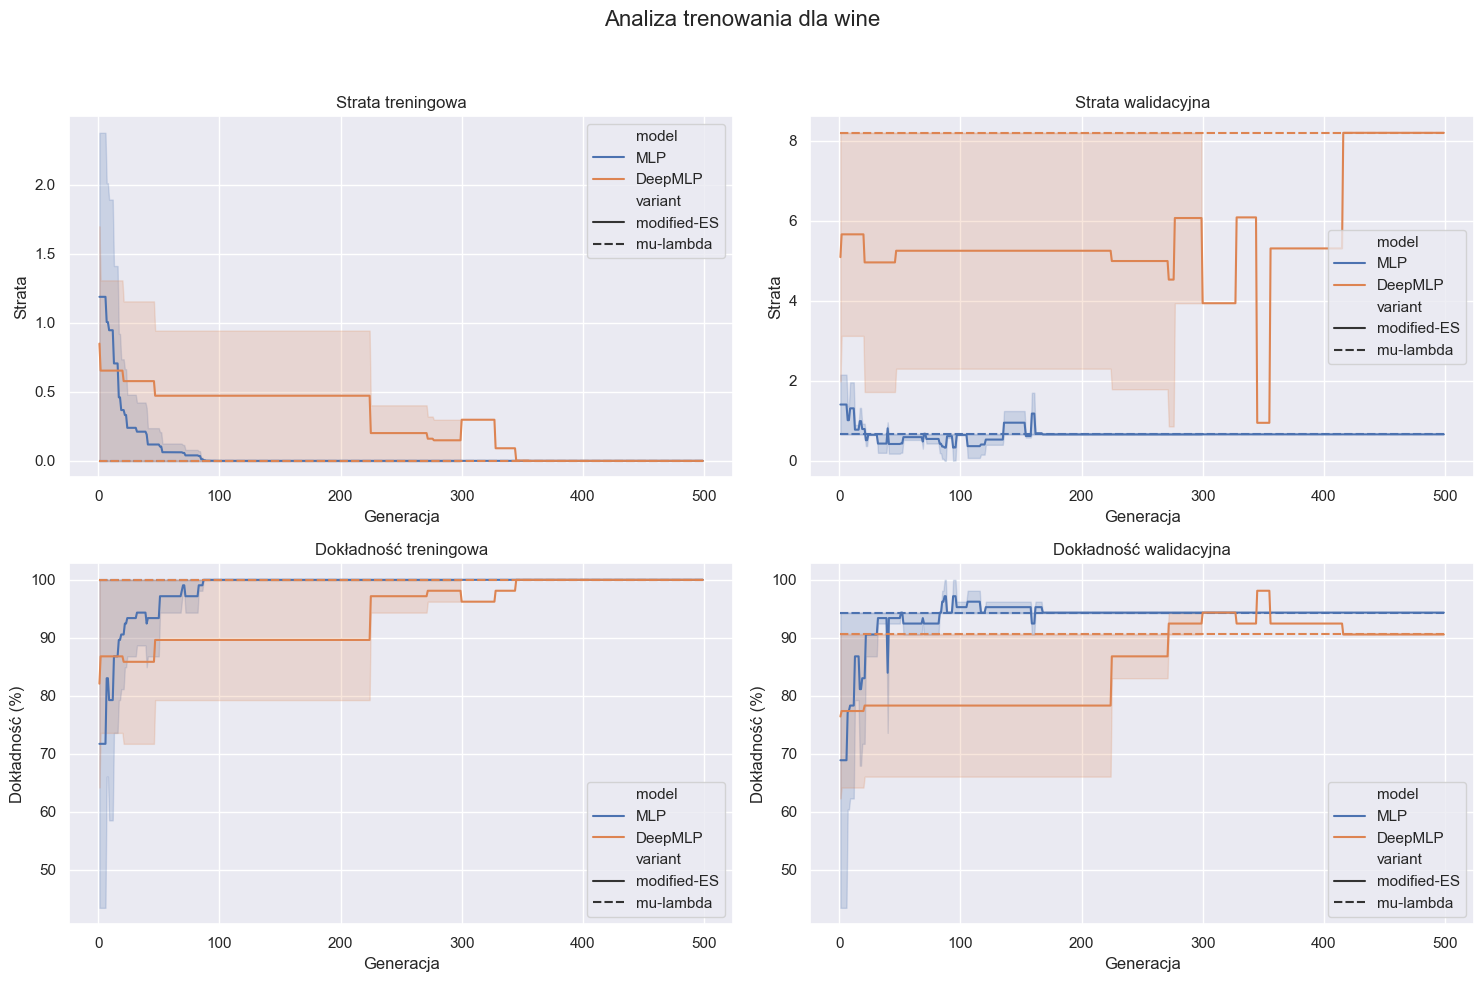

<Figure size 1500x1000 with 0 Axes>

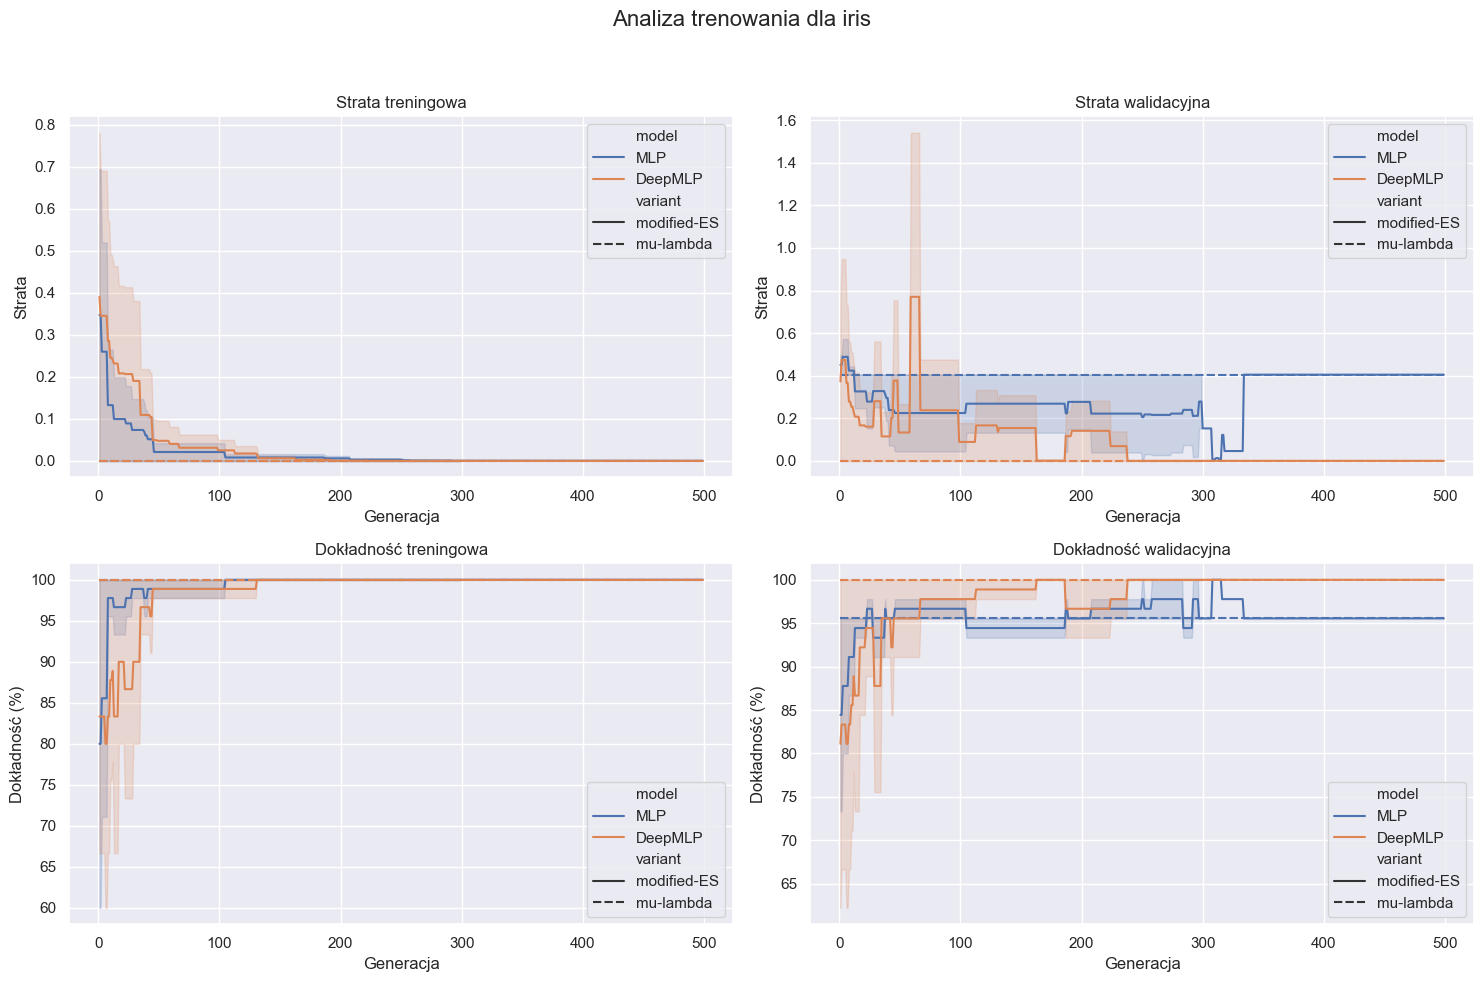

<Figure size 1500x1000 with 0 Axes>

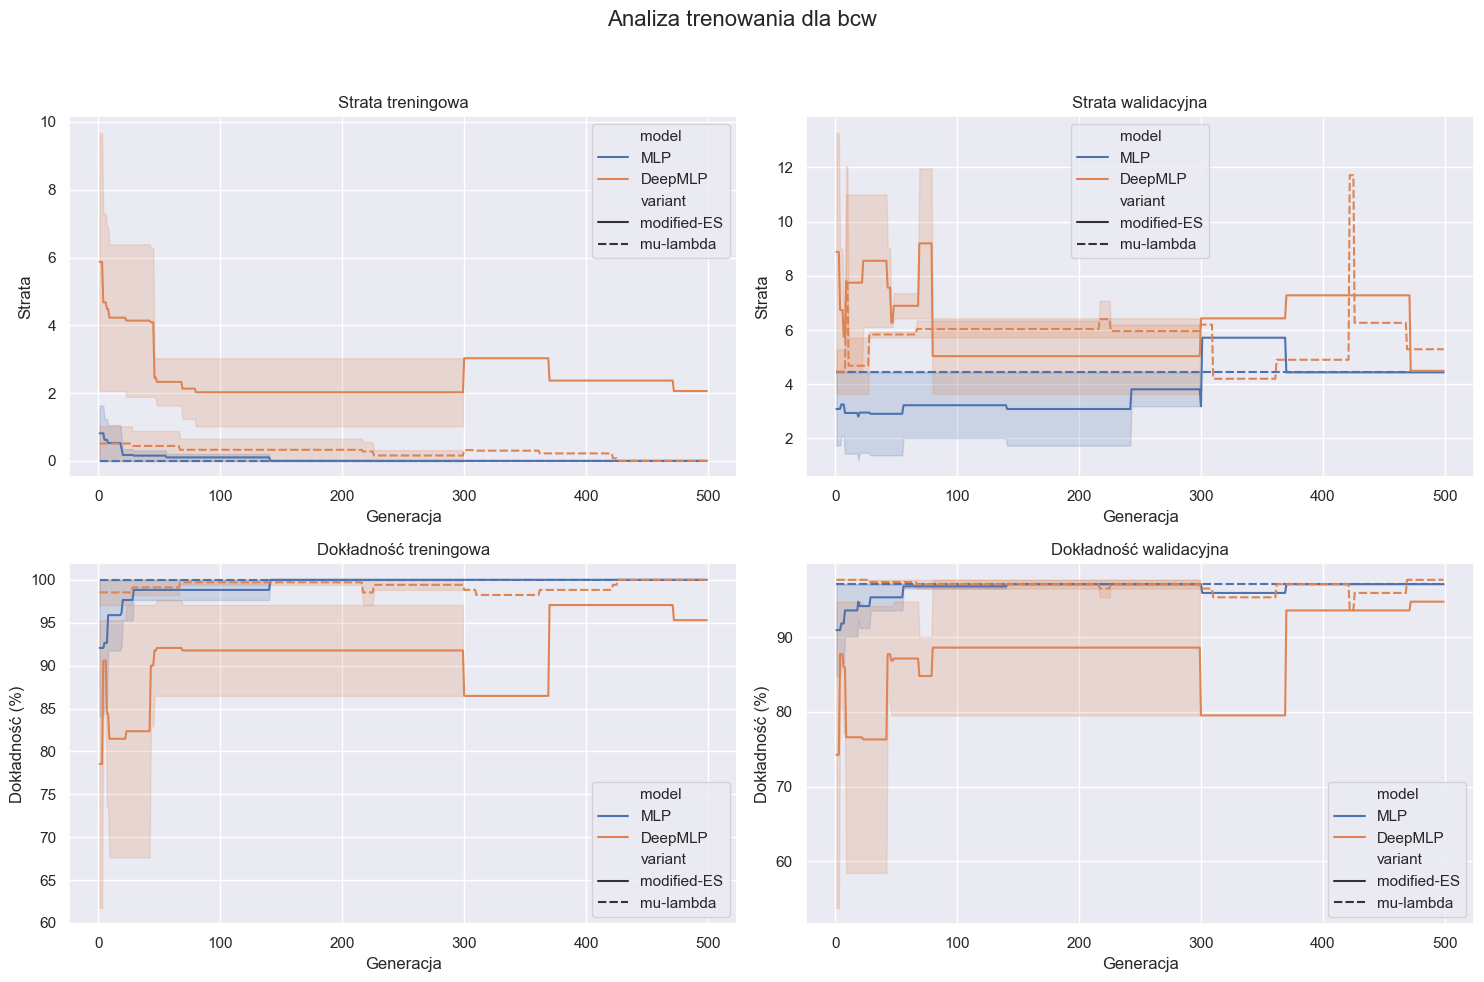

In [22]:
df = process_data(results)

plot_training_history(df)

<Figure size 1500x1000 with 0 Axes>

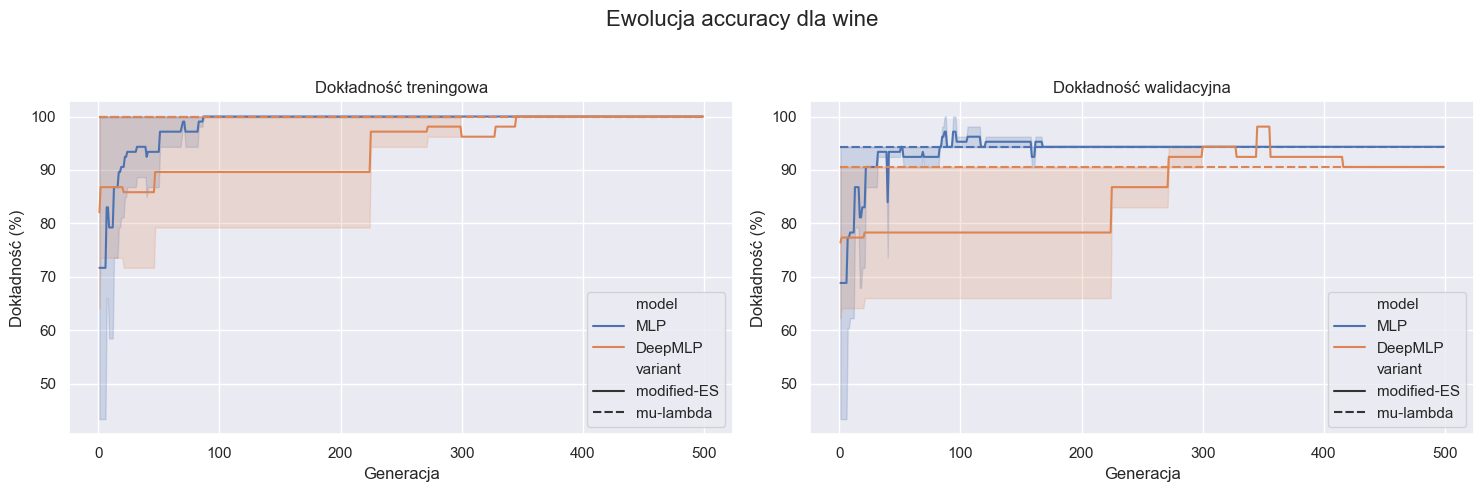

<Figure size 1500x1000 with 0 Axes>

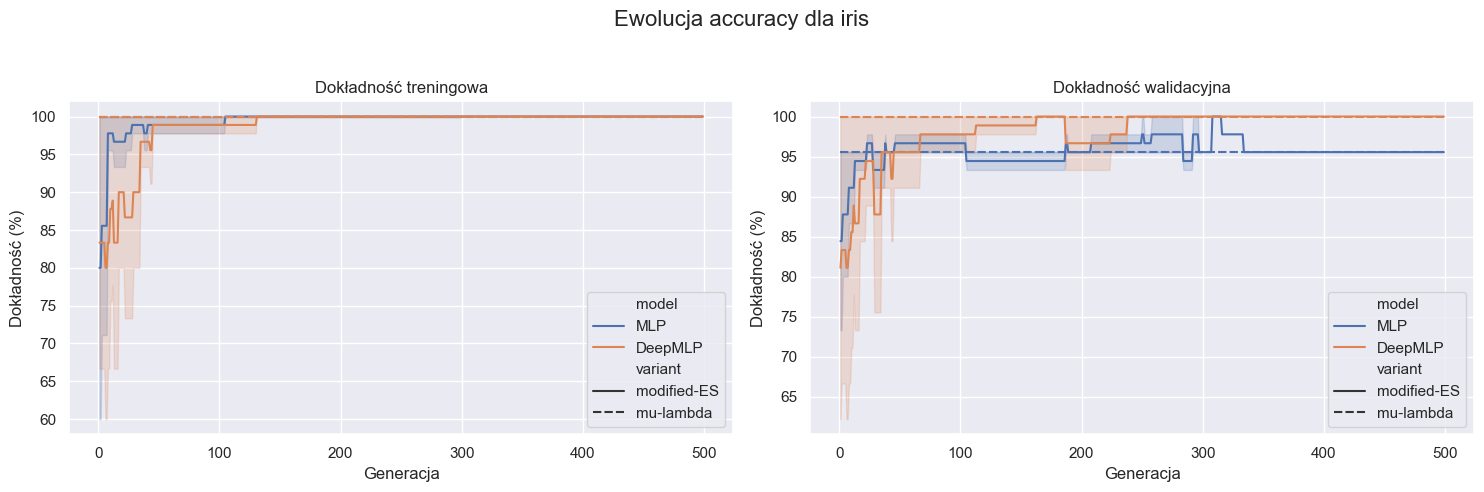

<Figure size 1500x1000 with 0 Axes>

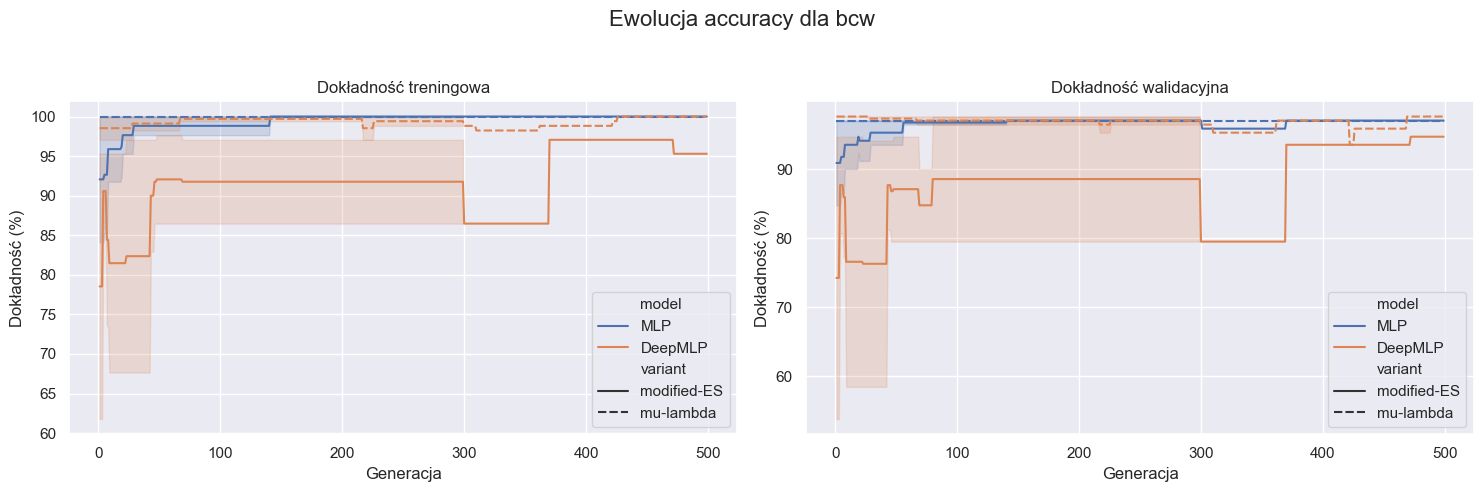

In [23]:
plot_accuracy_evolution(df)

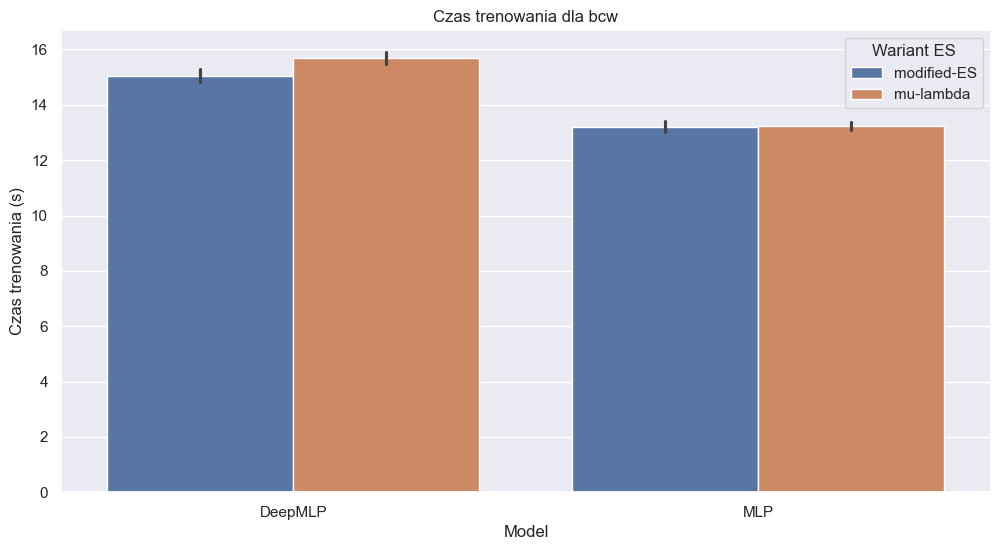

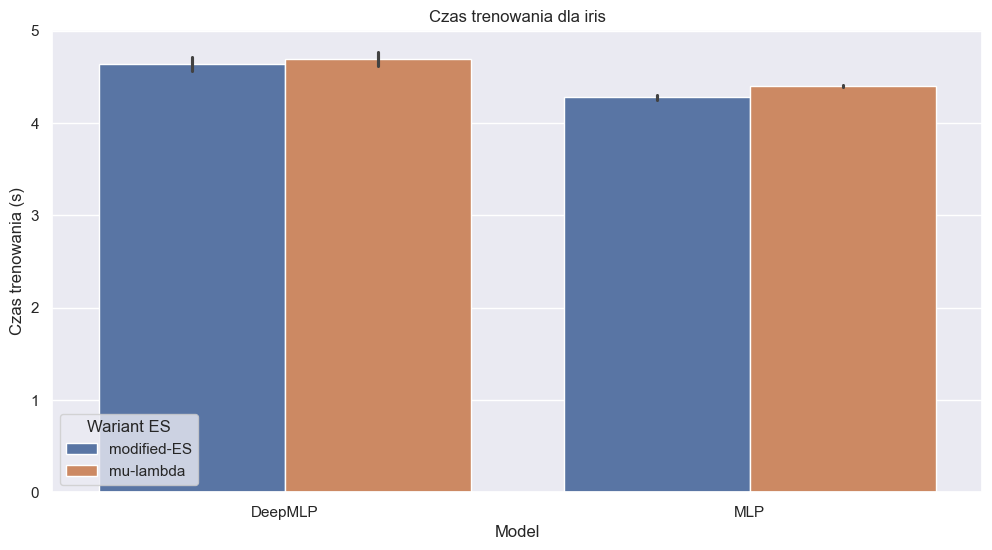

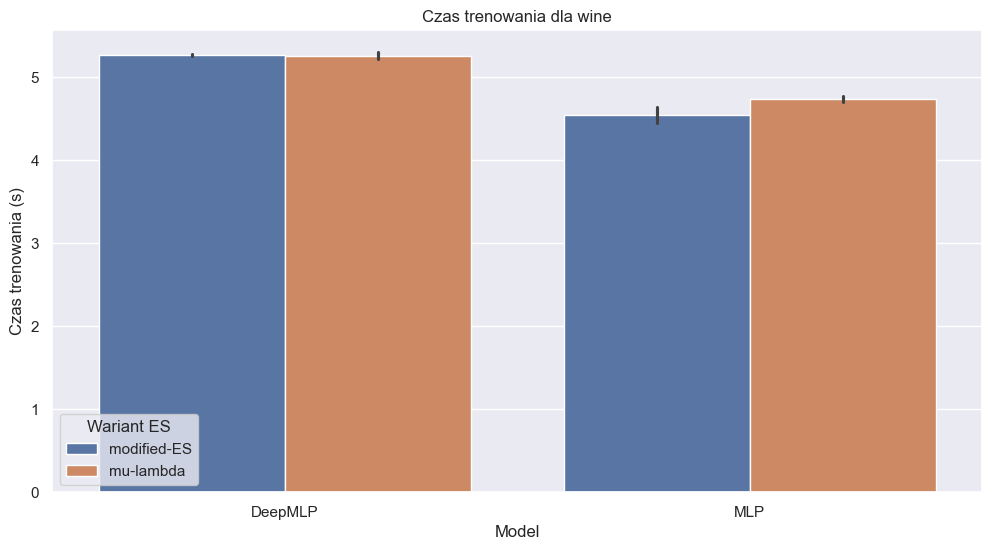

In [24]:
averages, last_gen = get_averages(df)

plot_training_time(averages)


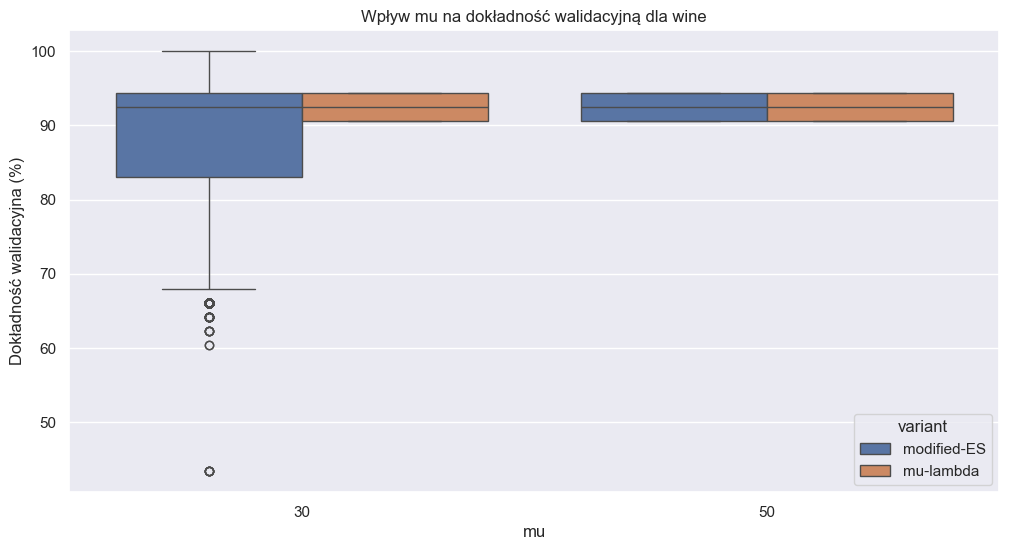

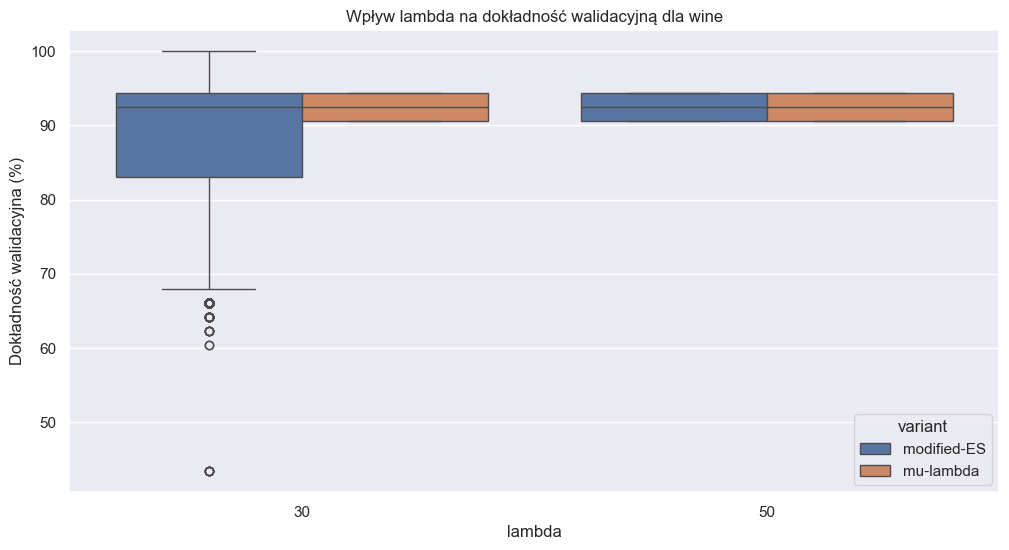

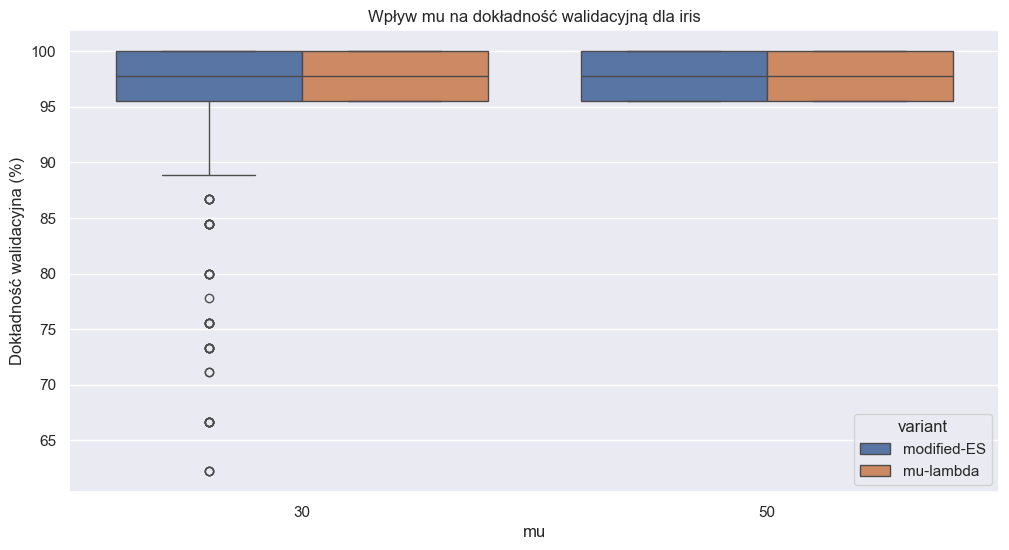

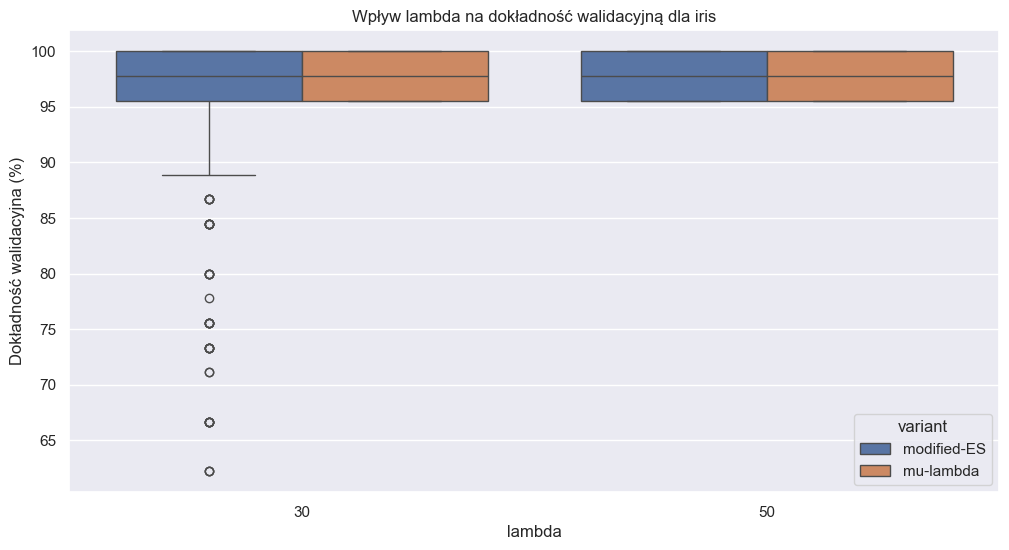

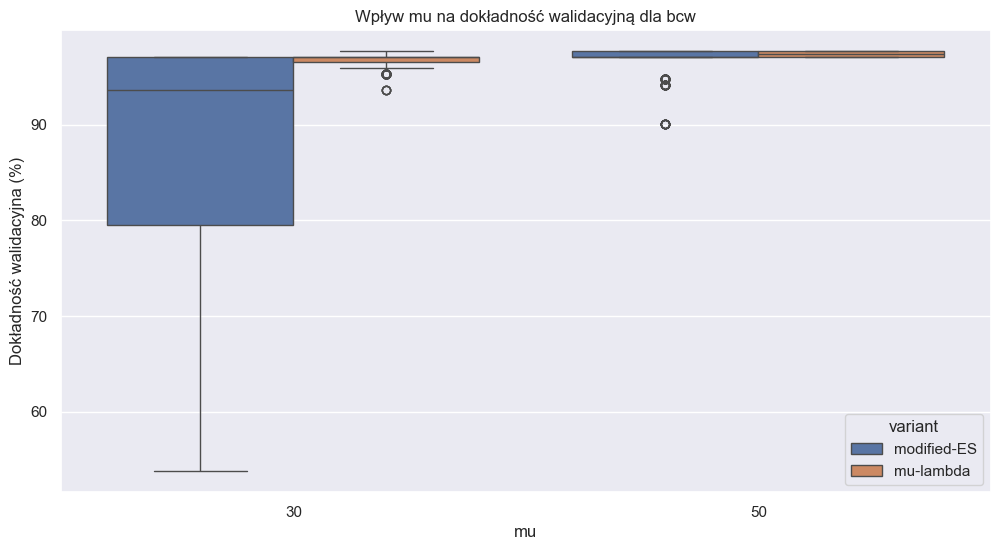

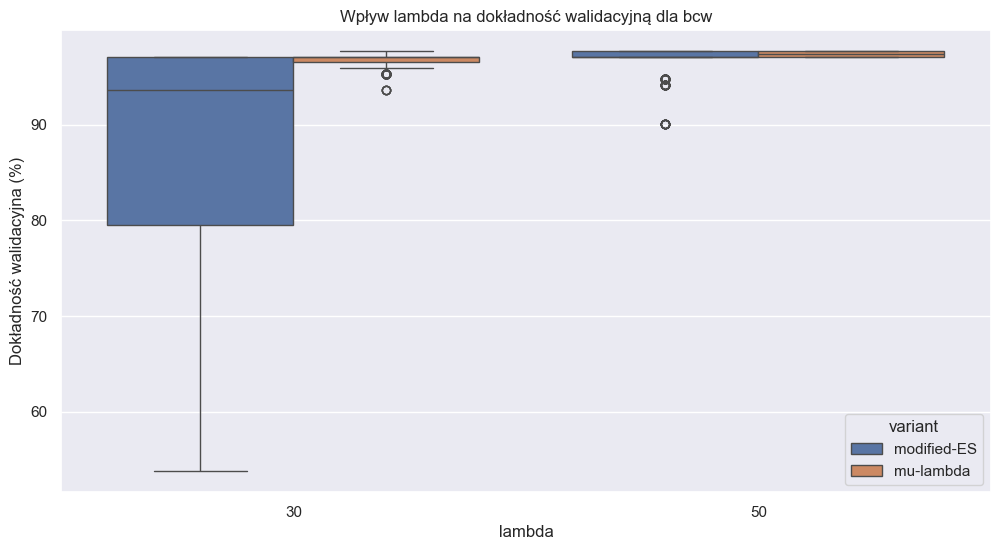

In [25]:

plot_analysis_of_input(df)